# Art in Pittsburgh
#### By: Liam Sullivan

One of the metrics we used to determine the best neighborhood is the amount of street art in each neighborhood, as it adds a new layer of interest to otherwise bland streets and buildings.

In [2]:
# loading pandas and numpy libraries
import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt

Let's load in our data now.

In [4]:
art = pd.read_csv("art.csv")
art

id        name                              title  \
0     812728309        1001              Oakwood Road Monument   
1     188255168        1002  Rooster Waiting For The Streetcar   
2    2032091917         129        Middle East Memorial Plaque   
3    1447629273         143                           L'Enfant   
4    1935017944         148      Veterans Memorial (Brookline)   
..          ...         ...                                ...   
194  1089921133  WM00099000        17th Ward Veterans Memorial   
195   191395610  WM00101000          Saint Josephat Honor Roll   
196   628976107  WM00102000              World War II Momument   
197  1309894649  WM00105000       Korean War Veterans Memorial   
198  1903851764  WM00107000          Vietnam Veterans Memorial   

                           artist_name                     art_type  \
0                                  NaN                          NaN   
1                          James Simon  Modern and Contemporary Art   
2                                  NaN                War Memorials   
3                    Paul Roger-Bloche                 Historic Art   
4                                  NaN                War Memorials   
..                                 ...                          ...   
194                                NaN               Non-City Owned   
195                                NaN               Non-City Owned   
196                                NaN               Non-City Owned   
197  R. Allan Christianson (Architect)                War Memorials   
198                    George Danhires                War Memorials   

                           park image               neighborhood  \
0                           NaN   NaN                    Oakwood   
1                           NaN   NaN                    Elliott   
2                           NaN   NaN  Central Business District   
3                           NaN   NaN                    Carrick   
4            Brookline Monument   NaN                  Brookline   
..                          ...   ...                        ...   
194                         NaN   NaN           South Side Flats   
195                         NaN   NaN          South Side Slopes   
196                         NaN   NaN              Spring Garden   
197  Northshore Riverfront Park   NaN                North Shore   
198  Northshore Riverfront Park   NaN                North Shore   

     council_district  ward         tract  public_works_division  \
0                 2.0  28.0  4.200356e+10                    5.0   
1                 2.0  20.0  4.200356e+10                    5.0   
2                 6.0   1.0  4.200302e+10                    6.0   
3                 4.0  29.0  4.200329e+10                    3.0   
4                 4.0  19.0  4.200319e+10                    5.0   
..                ...   ...           ...                    ...   
194               3.0  17.0  4.200317e+10                    3.0   
195               3.0  16.0  4.200316e+10                    3.0   
196               1.0  26.0  4.200324e+10                    1.0   
197               1.0  22.0  4.200398e+10                    6.0   
198               1.0  22.0  4.200398e+10                    6.0   

     pli_division  police_zone fire_zone   latitude  longitude  
0            28.0          6.0      1-19  40.429192 -80.066225  
1            20.0          6.0      1-17  40.442926 -80.039711  
2             1.0          2.0       1-4  40.438092 -79.996852  
3            29.0          3.0      4-23  40.388748 -79.986497  
4            19.0          6.0      4-26  40.391721 -80.016981  
..            ...          ...       ...        ...        ...  
194          17.0          3.0      4-24  40.428635 -79.980443  
195          16.0          3.0      4-22  40.423129 -79.973486  
196          26.0          1.0      1-11  40.471780 -79.986670  
197          22.0          1.0       1-7  40.445726 -80.008082  
198          22.0 

There is a lot of information in this file, so lets isolate it to neighborhoods and number of art pieces per neighborhood.

In [9]:
art.iloc[:,0] = 1
values = art.groupby('neighborhood').sum()['id']
values

neighborhood
Allegheny Center             18
Allegheny West                1
Allentown                     2
Beechview                     7
Beltzhoover                   3
Bloomfield                    1
Brighton Heights              5
Brookline                     2
Carrick                       2
Central Business District    27
Central Lawrenceville         2
Central Oakland               5
Crafton Heights               1
Crawford-Roberts              3
Duquesne Heights              3
East Allegheny                2
East Carnegie                 1
East Hills                    1
East Liberty                  1
Elliott                       3
Esplen                        1
Garfield                      2
Greenfield                    3
Hays                          1
Hazelwood                     3
Highland Park                10
Knoxville                     1
Lincoln-Lemington-Belmar      2
Lower Lawrenceville           5
Manchester                    1
Mount Washington           

This is a lot of data to sift through though, so lets take the best 5 and put them in a bar graph.

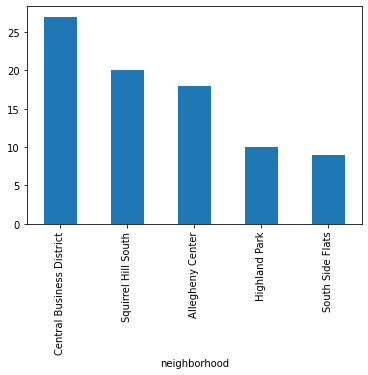

In [10]:
values = values.sort_values(ascending=False)
high = values.head(5)
high.plot.bar(x = values[0], y = values[1])

## Geographical Map

Let's try interpreting this data in a way that's a little easier to read.

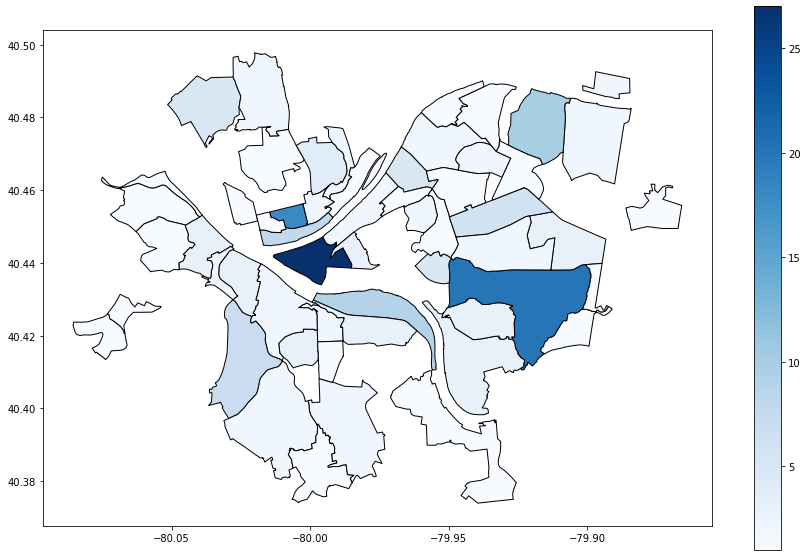

In [7]:
# read file
import geopandas
import shapely
neighborhoods = geopandas.read_file("Neighborhoods/Neighborhoods_.shp")
# data -> map
neighborhoodMap = neighborhoods.merge(values, how = 'left',left_on = 'hood', right_on = 'neighborhood')
neighborhoodMap.plot(column = 'id',cmap = 'Blues', edgecolor ='black',figsize = (15,10), legend = True)

The neighborhoods that contain no art pieces are missing borders though. Let's add them back.

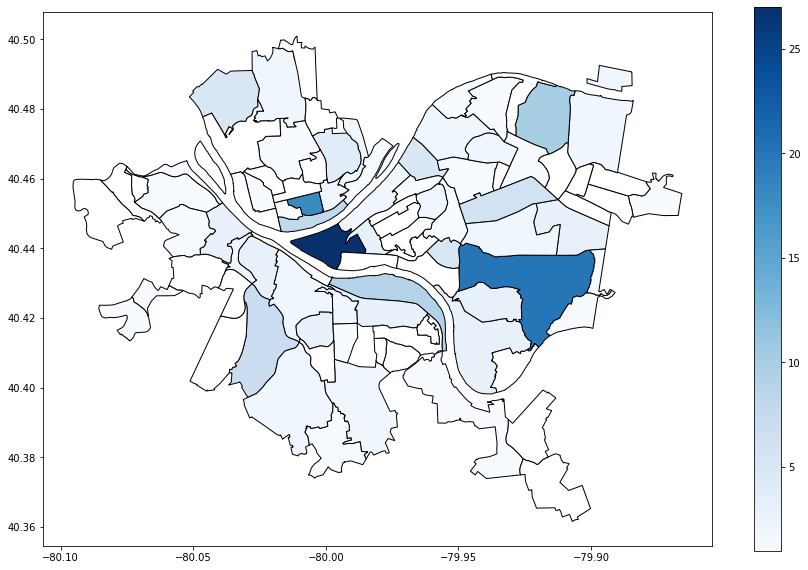

In [11]:
neighborhoodMap.plot(column = 'id',cmap = 'Blues', edgecolor ='black',figsize = (15,10), legend = True, missing_kwds={"color": "white"})

## Best Neighborhood

According to our street art data, **Downtown Pittsburgh** is the "prettiest" neighborhood in Pittsburgh without accounting for other metrics.